In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Specify the path to your folder
folder_path = '/content/drive/MyDrive/features/'

# List the files in the folder
files = os.listdir(folder_path)

# Print the list of files
print(files)

['val_batch_4.pt', 'val_batch_5.pt', 'val_batch_6.pt', 'val_batch_7.pt', 'val_batch_8.pt', 'val_batch_9.pt', 'test_batch_1.pt', 'test_batch_2.pt', 'test_batch_3.pt', 'test_batch_4.pt', 'test_batch_5.pt', 'test_batch_6.pt', 'test_batch_7.pt', 'test_batch_8.pt', 'test_batch_9.pt', 'test_batch_final.pt', 'train_batch_0.pt', 'train_batch_1.pt', 'train_batch_2.pt', 'train_batch_3.pt', 'train_batch_4.pt', 'train_batch_5.pt', 'train_batch_6.pt', 'train_batch_8.pt', 'train_batch_9.pt', 'train_batch_10.pt', 'train_batch_11.pt', 'train_batch_12.pt', 'train_batch_13.pt', 'train_batch_14.pt', 'train_batch_15.pt', 'train_batch_16.pt', 'train_batch_17.pt', 'train_batch_18.pt', 'train_batch_19.pt', 'train_batch_20.pt', 'train_batch_21.pt', 'train_batch_22.pt', 'train_batch_23.pt', 'train_batch_24.pt', 'train_batch_25.pt', 'train_batch_26.pt', 'train_batch_27.pt', 'train_batch_28.pt', 'train_batch_29.pt', 'train_batch_30.pt', 'train_batch_31.pt', 'train_batch_32.pt', 'train_batch_33.pt', 'train_batch_

In [ ]:
# Count the number of files in the directory
num_files = len(files)

# Print the number of files
print(f'Total files in the folder: {num_files}')

Total files in the folder: 103


In [ ]:
import torch

# Specify the file path (adjust to the actual file you want to inspect)
file_path = '/content/drive/MyDrive/features/train_batch_0.pt'

# Load the tensor or data from the file
data = torch.load(file_path)

# Print the type of the data
print(f"Type of the data: {type(data)}")

Type of the data: <class 'list'>


In [ ]:
# Print the length of the list
print(f"Length of the list: {len(data)}")

Length of the list: 100


In [ ]:
# Set to store unique data types
unique_data_types = set()

# Loop through the list and store the data types
for i, item in enumerate(data):
    unique_data_types.add(type(item))

# Print the unique data types
print(f"Unique data types in the list: {unique_data_types}")

Unique data types in the list: {<class 'dict'>}


In [ ]:
# Get the first dictionary from the list
first_dict = data[0]

# Print the keys of the first dictionary
print(f"Keys in the first dictionary: {first_dict.keys()}")

Keys in the first dictionary: dict_keys(['caption', 'act', 'emo', 'obj'])


Emotion Tensor

In [ ]:
# Get the 'emo' tensor from the first dictionary
emo_tensor = first_dict['emo']

# Print the type and shape of the 'emo' tensor
print(f"Type of 'emo' tensor: {type(emo_tensor)}")
if isinstance(emo_tensor, torch.Tensor):
    print(f"Shape of 'emo' tensor: {emo_tensor.shape}")
else:
    print("The 'emo' key does not contain a tensor.")

Type of 'emo' tensor: <class 'torch.Tensor'>
Shape of 'emo' tensor: torch.Size([1, 768])


In [ ]:
# Create a list to hold the 'emo' tensors
emo_tensors = []

# Loop through the data to collect the 'emo' tensors
for i, item in enumerate(data):
    emo_tensors.append(item['emo'])

# Stack the tensors to create a single tensor of shape [100, 768]
emo_data = torch.stack(emo_tensors)

# Calculate the variance for each feature (column) across the samples
emo_variance = emo_data.var(dim=0)

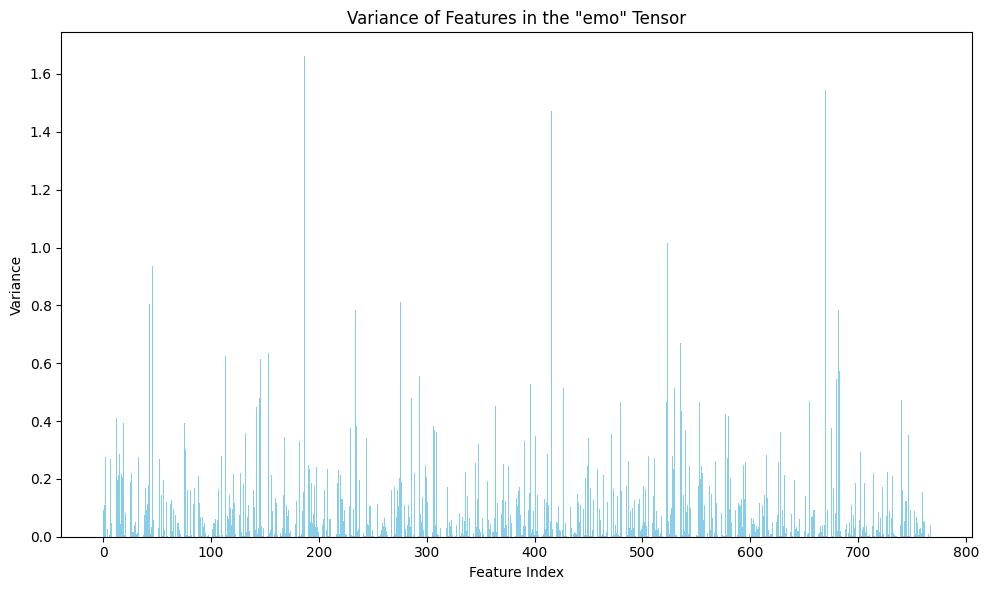

In [ ]:
import matplotlib.pyplot as plt

# Convert the variance tensor to a numpy array for easy plotting
emo_variance_numpy = emo_variance.numpy().flatten()

# Plot the variance for each feature
plt.figure(figsize=(10, 6))
plt.bar(range(len(emo_variance_numpy)), emo_variance_numpy, color='skyblue')
plt.title('Variance of Features in the "emo" Tensor')
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

Shape of the stacked 'emo' data: (100, 768)


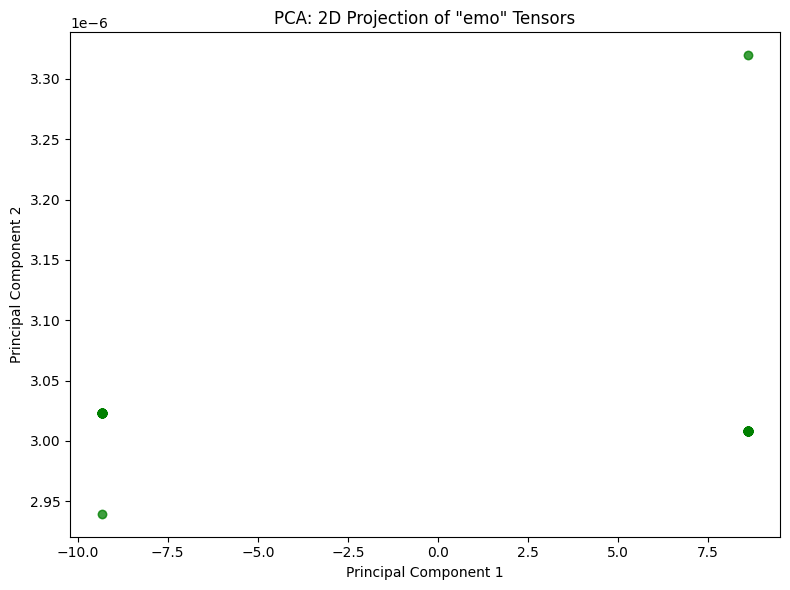

In [ ]:
from sklearn.decomposition import PCA

# Collect 'emo' tensors into a list
emo_data_list = [item['emo'].squeeze(0) for item in data]  # Remove the extra dimension if it exists

# Stack the tensors into a 2D array
emo_data_numpy = torch.stack(emo_data_list).numpy()

# Check the shape to make sure it's (100, 768)
print("Shape of the stacked 'emo' data:", emo_data_numpy.shape)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
emo_data_pca = pca.fit_transform(emo_data_numpy)

# Plot the reduced 2D data
plt.figure(figsize=(8, 6))
plt.scatter(emo_data_pca[:, 0], emo_data_pca[:, 1], color='green', alpha=0.5)
plt.title('PCA: 2D Projection of "emo" Tensors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Check how many unique tensors exist in the dataset
unique_emo_tensors = np.unique(emo_data_list, axis=0)  # Find unique rows (tensors)

# Print out the number of unique tensors
print(f"Number of unique 'emo' tensors: {len(unique_emo_tensors)}")

Number of unique 'emo' tensors: 2


Action Tensor

In [ ]:
# Get the 'act' tensor from the first dictionary
emo_tensor = first_dict['act']

# Print the type and shape of the 'act' tensor
print(f"Type of 'act' tensor: {type(emo_tensor)}")
print(f"Shape of 'act' tensor: {emo_tensor.shape}")

Type of 'act' tensor: <class 'torch.Tensor'>
Shape of 'act' tensor: torch.Size([1, 768])


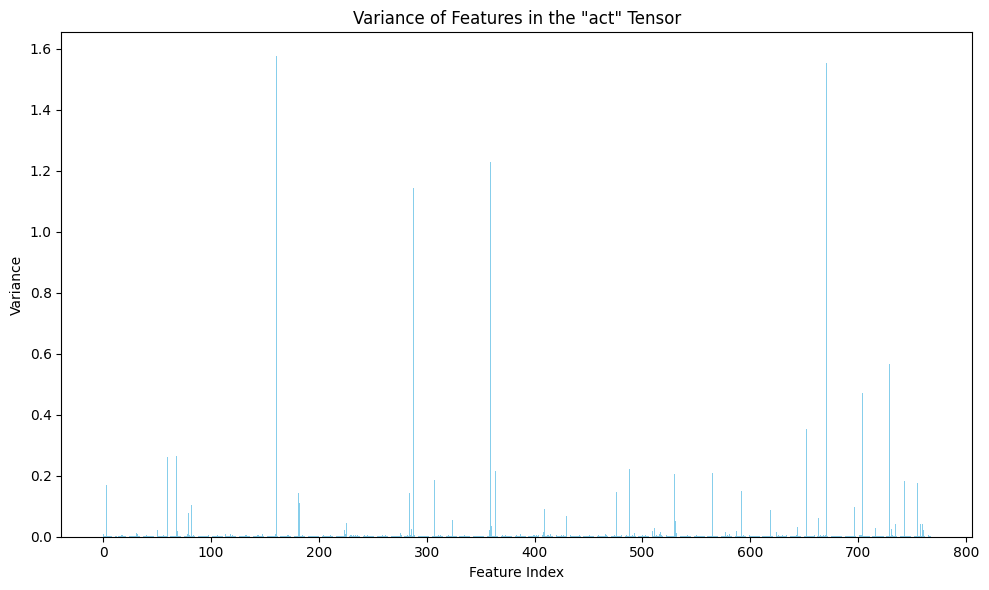

In [ ]:
# Create a list to hold the 'act' tensors
act_tensors = []

# Loop through the data to collect the 'act' tensors
for i, item in enumerate(data):
    act_tensors.append(item['act'])

# Stack the tensors to create a single tensor of shape [100, 768]
act_data = torch.stack(act_tensors)

# Calculate the variance for each feature (column) across the samples
act_variance = act_data.var(dim=0)

# Convert the variance tensor to a numpy array for easy plotting
act_variance_numpy = act_variance.numpy().flatten()

# Plot the variance for each feature
plt.figure(figsize=(10, 6))
plt.bar(range(len(act_variance_numpy)), act_variance_numpy, color='skyblue')
plt.title('Variance of Features in the "act" Tensor')
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

Shape of the stacked 'act' data: (100, 768)


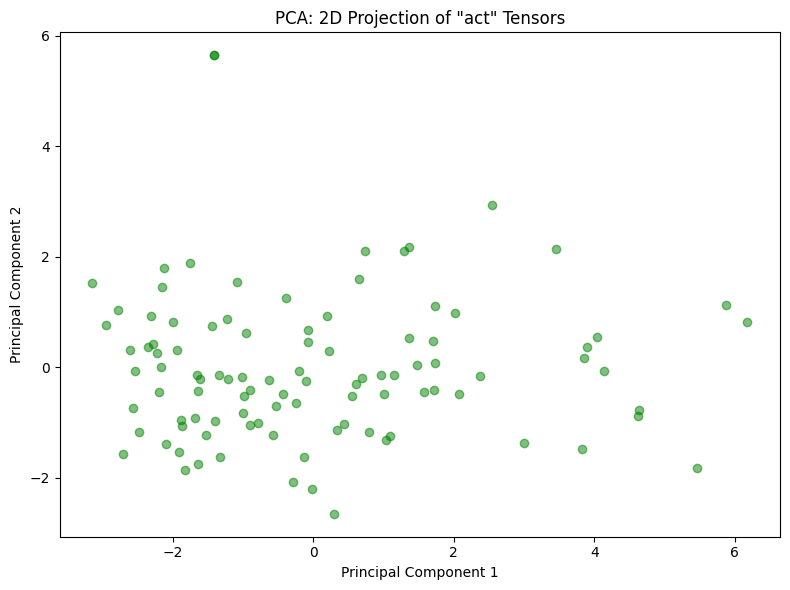

In [ ]:
# Collect 'act' tensors into a list
act_data_list = [item['act'].squeeze(0) for item in data]  # Remove the extra dimension if it exists

# Stack the tensors into a 2D array
act_data_numpy = torch.stack(act_data_list).numpy()

# Check the shape to make sure it's (100, 768)
print("Shape of the stacked 'act' data:", act_data_numpy.shape)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
act_data_pca = pca.fit_transform(act_data_numpy)

# Plot the reduced 2D data
plt.figure(figsize=(8, 6))
plt.scatter(act_data_pca[:, 0], act_data_pca[:, 1], color='green', alpha=0.5)
plt.title('PCA: 2D Projection of "act" Tensors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Check how many unique tensors exist in the dataset
unique_act_tensors = np.unique(act_data_list, axis=0)  # Find unique rows (tensors)

# Print out the number of unique tensors
print(f"Number of unique 'act' tensors: {len(unique_act_tensors)}")

Number of unique 'act' tensors: 99


Object Tensor

In [ ]:
# Get the 'obj' tensor from the first dictionary
emo_tensor = first_dict['obj']

# Print the type and shape of the 'obj' tensor
print(f"Type of 'obj' tensor: {type(emo_tensor)}")
print(f"Shape of 'obj' tensor: {emo_tensor.shape}")

Type of 'obj' tensor: <class 'torch.Tensor'>
Shape of 'obj' tensor: torch.Size([1, 768])


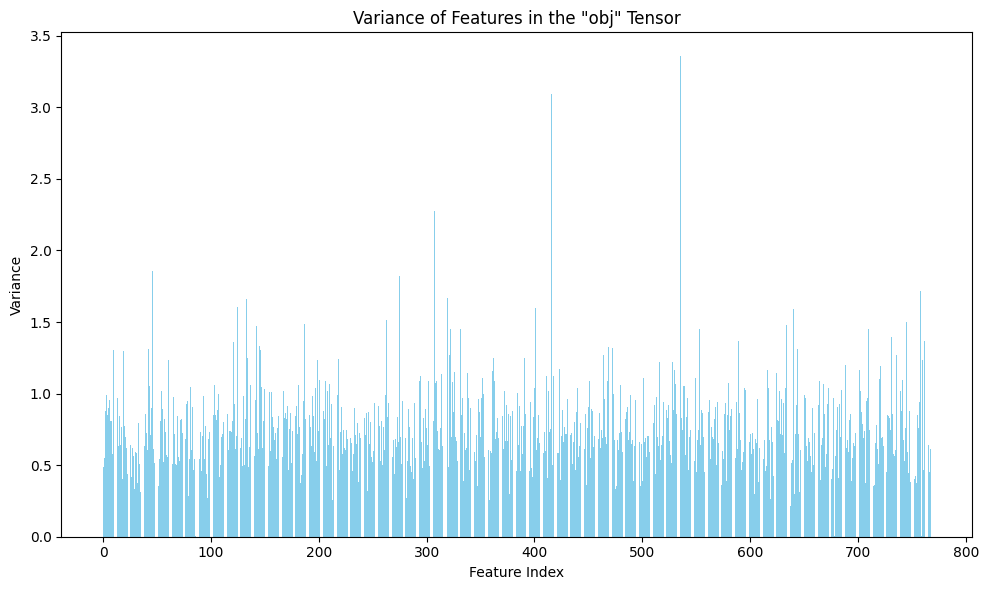

In [ ]:
# Create a list to hold the 'obj' tensors
obj_tensors = []

# Loop through the data to collect the 'obj' tensors
for i, item in enumerate(data):
    obj_tensors.append(item['obj'])

# Stack the tensors to create a single tensor of shape [100, 768]
obj_data = torch.stack(obj_tensors)

# Calculate the variance for each feature (column) across the samples
obj_variance = obj_data.var(dim=0)

# Convert the variance tensor to a numpy array for easy plotting
obj_variance_numpy = obj_variance.numpy().flatten()

# Plot the variance for each feature
plt.figure(figsize=(10, 6))
plt.bar(range(len(obj_variance_numpy)), obj_variance_numpy, color='skyblue')
plt.title('Variance of Features in the "obj" Tensor')
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

Shape of the stacked 'obj' data: (100, 768)


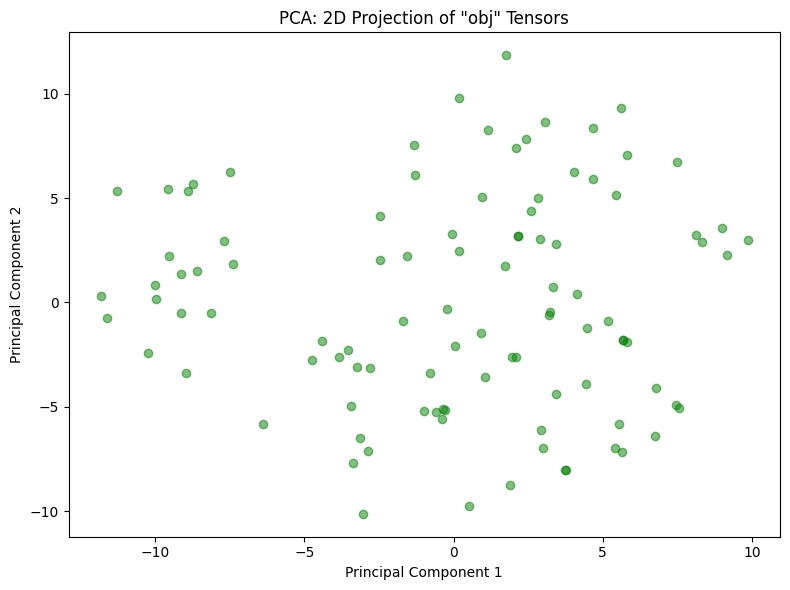

In [ ]:
# Collect 'obj' tensors into a list
obj_data_list = [item['obj'].squeeze(0) for item in data]  # Remove the extra dimension if it exists

# Stack the tensors into a 2D array
obj_data_numpy = torch.stack(obj_data_list).numpy()

# Check the shape to make sure it's (100, 768)
print("Shape of the stacked 'obj' data:", obj_data_numpy.shape)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
obj_data_pca = pca.fit_transform(obj_data_numpy)

# Plot the reduced 2D data
plt.figure(figsize=(8, 6))
plt.scatter(obj_data_pca[:, 0], obj_data_pca[:, 1], color='green', alpha=0.5)
plt.title('PCA: 2D Projection of "obj" Tensors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Check how many unique tensors exist in the dataset
unique_obj_tensors = np.unique(obj_data_list, axis=0)  # Find unique rows (tensors)

# Print out the number of unique tensors
print(f"Number of unique 'obj' tensors: {len(unique_obj_tensors)}")

Number of unique 'obj' tensors (rounded): 99
